# Neural Networks with NumPy and PyTorch

In this notebook we will look at how to implement various Neural Network modules using Numpy and Pytorch. We will then finally use all these modules to build a multi-layered perceptron (MLP).



In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

# # The following code is used for hiding the warnings and make this notebook clearer.
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

## Miscellaneous code for plotting decision boundary (ignore)

In [2]:
## Miscellaneous code to plot decision boundary (ignore) ##

def plot_decision_regions(X, y, classifier, method, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if method == 'numpy':
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    elif method == 'pytorch':
        inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
        Z = np.array([]).reshape(0,1)
        for data in inp:
            out = classifier(data)
            Z = np.vstack((Z, out.data.numpy()))
    else:
        print('Not implemented')
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

## From perceptron to dense layer

We have earlier seen perceptron learning algorithm in details. A perceptron or a neuron is a mathematical function that takes in input a vector and outputs a single numerical value.

![](https://drive.google.com/uc?export=view&id=13iunc0gCEikqIJWf_LxkacCxZx2mzxpU)

The neuron is defined as follows:
$$
y = f \left( \sum_i (x_i w_i + b) \right)
$$

We will now use several of these neurons in a layer and stack several layers to create a multi-layered neural network.

![](https://drive.google.com/uc?export=view&id=1WMj9bf-TdqBobkHN80xQMmXnPzX3UQUt)

We will now create a neural network with two neurons in the hidden layer and we will show how this can model the XOR function using Numpy. However, we will write code that will allow the reader to simply modify it to allow for any number of layers and neurons in each layer, so that the reader can try simulating different scenarios. We are also going to use the hyperbolic tangent as the activity function for this network. To train the network, we will implement the back-propagation algorithm.

![](https://drive.google.com/uc?export=view&id=1Td_t6W-KvogNMLBu2zQawfNBmB161OZ7)



### PyTorch implementation

We will now solve the same non-linear XOR problem, but this time we will use Pytorch library instead of using Numpy.

Define the input data

In [3]:
torch.manual_seed(0)

X = torch.tensor([[0,0],[0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([0,1,1,0], dtype=torch.float, requires_grad=False)


Define the Nerual Network class `Net`

In [4]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # Initialize all the layers with learnable parameters
        self.fc1 = nn.Linear(2, 2, True) 
        self.fc2 = nn.Linear(2, 1, True)

    def forward(self, x):
        # Write the forward pass
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

model = Net()

Initialize the weights

In [5]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)


Define the loss function

In [6]:
loss_func = nn.MSELoss()

Define optimizer

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

Write the training routine

In [9]:
epochs = 5000
steps = X.size(0)
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y[sample]
        
        optimizer.zero_grad()

        y_hat = model(x_var)
        
        loss = loss_func.forward(y_hat[0], y_var)
        loss.backward()
        
        optimizer.step()
        
    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

Epoch: 0, Loss: 0.05511976405978203, 
Epoch: 500, Loss: 0.015047666616737843, 
Epoch: 1000, Loss: 0.005735413637012243, 
Epoch: 1500, Loss: 0.007443094626069069, 
Epoch: 2000, Loss: 0.0052114371210336685, 
Epoch: 2500, Loss: 0.0030797298531979322, 
Epoch: 3000, Loss: 0.0035965607967227697, 
Epoch: 3500, Loss: 0.0029731595423072577, 
Epoch: 4000, Loss: 0.0014232777757570148, 
Epoch: 4500, Loss: 0.0012977489968761802, 


Check the output

In [10]:
for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

tensor([0., 0.]) [0.]
tensor([0., 1.]) [1.]
tensor([1., 0.]) [1.]
tensor([1., 1.]) [0.]


Visualize the decision boundary

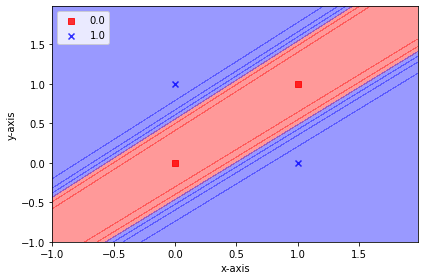

In [11]:
np.random.seed(0)
plot_decision_regions(X.detach().numpy(), Y.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()